___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers.
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information.
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones.
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations.
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words
- Create Word Cloud


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews.


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [1]:
!pip install scikit-learn-intelex

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.9/137.9 kB 855.9 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.5/10.5 MB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.2/63.2 MB 3.8 MB/s eta 0:00:00


In [2]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
!pip install autocorrect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 622.8/622.8 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for autocorrect: filename=autocorrect-2.6.1-py3-none-any.whl size=622363 sha256=78173c2e7c5fcc5a48a7920d87b94e99093423bd433162c69485adf6dd241d56
  Stored in directory: /root/.cache/pip/wheels/b5/7b/6d/b76b29ce11ff8e2521c8c7dd0e5bfee4fb1789d76193124343
Successfully built autocorrect


In [4]:
!pip install contractions

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 8.6 MB/s eta 0:00:00


In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import contractions
from autocorrect import Speller

import warnings
warnings.filterwarnings("ignore");
plt.rcParams["figure.figsize"] = (9,5)
pd.set_option('display.max_columns', 50)

In [6]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [7]:
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [8]:
df.drop(columns=['Unnamed: 0'],axis=1,inplace=True)

In [9]:
df.shape

(23486, 10)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              23486 non-null  int64 
 1   Age                      23486 non-null  int64 
 2   Title                    19676 non-null  object
 3   Review Text              22641 non-null  object
 4   Rating                   23486 non-null  int64 
 5   Recommended IND          23486 non-null  int64 
 6   Positive Feedback Count  23486 non-null  int64 
 7   Division Name            23472 non-null  object
 8   Department Name          23472 non-null  object
 9   Class Name               23472 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.8+ MB


In [11]:
df.isnull().sum()

Clothing ID                   0
Age                           0
Title                      3810
Review Text                 845
Rating                        0
Recommended IND               0
Positive Feedback Count       0
Division Name                14
Department Name              14
Class Name                   14
dtype: int64

### Feature Selection and Rename Column Name

In [12]:
df = df.rename(columns={"Recommended IND": "Recommended", "Review Text": "Review"})
df.head()

,Clothing ID,Age,Title,Review,Rating,Recommended,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [13]:
df.nunique()

Clothing ID                 1206
Age                           77
Title                      13993
Review                     22634
Rating                         5
Recommended                    2
Positive Feedback Count       82
Division Name                  3
Department Name                6
Class Name                    20
dtype: int64

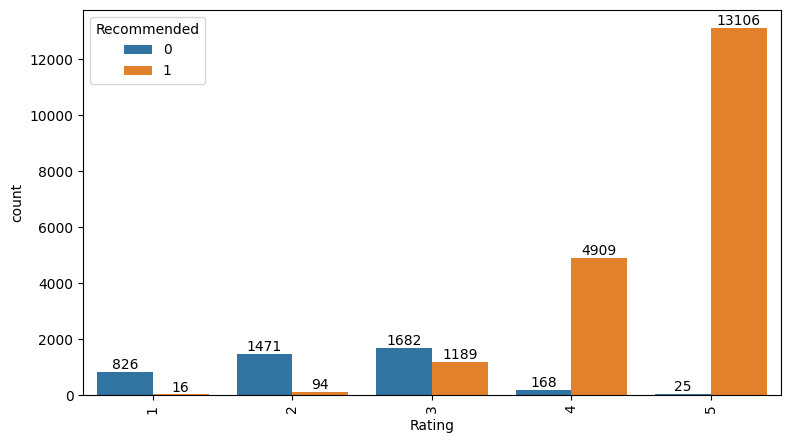

In [14]:
ax = sns.countplot(data = df,
                   x='Rating',
                   hue="Recommended")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =90);

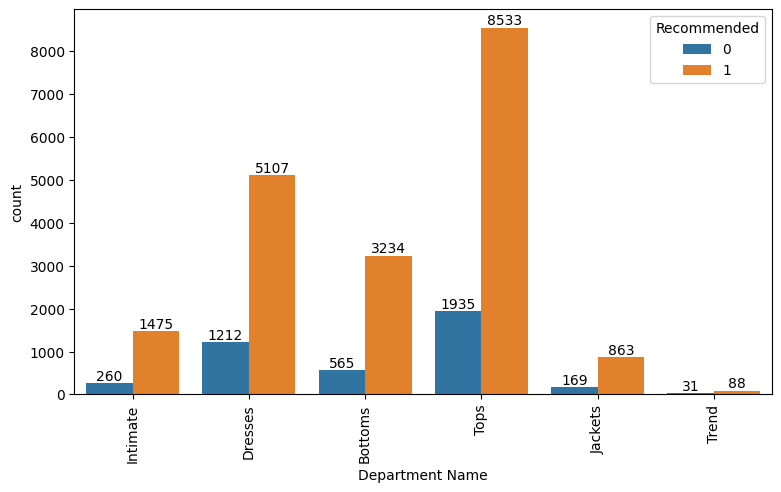

In [ ]:
ax = sns.countplot(data = df,
                   x='Department Name',
                   hue="Recommended")
for p in ax.containers:
    ax.bar_label(p)
plt.xticks(rotation =90);

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.


In [15]:
df.dropna(subset=['Review'], inplace=True)

#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [16]:
df['Recommended'].value_counts()

1    18540
0     4101
Name: Recommended, dtype: int64

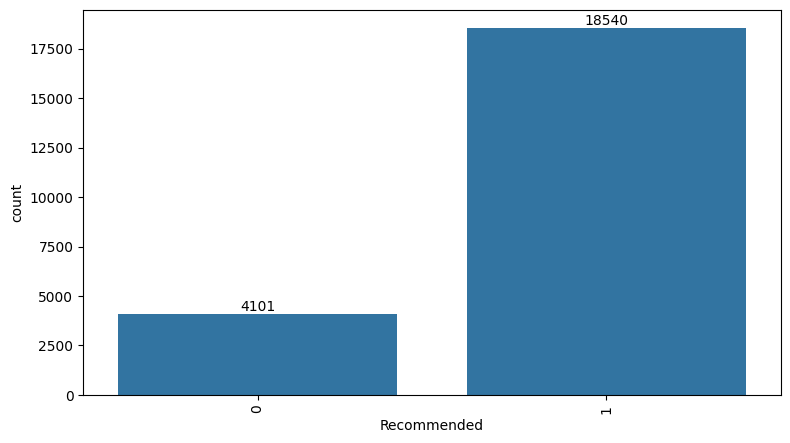

In [ ]:
ax = sns.countplot(data=df,
                   x="Recommended")
ax.bar_label(ax.containers[0])
plt.xticks(rotation=90);

---
---


In [17]:
df["Recommended"] = df["Recommended"].map({1:0, 0:1})

In [18]:
df["Recommended"].value_counts(dropna=True)

0    18540
1     4101
Name: Recommended, dtype: int64

In [ ]:
df["Recommended"].value_counts(normalize=True)

0    0.818868
1    0.181132
Name: Recommended, dtype: float64

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma).
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method.


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [ ]:
df['Review'][8]

'I love this dress. i usually get an xs but it runs a little snug in bust so i ordered up a size. very flattering and feminine with the usual retailer flair for style.'

In [19]:
df1=df.copy()

In [20]:
df1 =df1[["Review", "Recommended"]]
df1.head()

,Review,Recommended
0,Absolutely wonderful - silky and sexy and comf...,0
1,Love this dress! it's sooo pretty. i happene...,0
2,I had such high hopes for this dress and reall...,1
3,"I love, love, love this jumpsuit. it's fun, fl...",0
4,This shirt is very flattering to all due to th...,0


In [21]:
import re

In [22]:
def tokens(words):
    words = re.sub("[^a-zA-Z]"," ", words)
    text = words.lower().split()
    return " ".join(text)

In [23]:
stop_words = stopwords.words('english')
print(stop_words[::10])

['i', "you've", 'himself', 'they', 'that', 'been', 'a', 'while', 'through', 'in', 'here', 'few', 'own', 'just', 're', 'doesn', 'ma', "shouldn't"]


In [24]:
clothes =['dress','color','wear','top','sweater','material','shirt','jeans','pant',
          'skirt','order','white','black','fabric','blouse','sleeve','even', 'jacket']

In [25]:
def stopwords(review):
    text = [word.lower() for word in review.split() if word.lower() not in stop_words and word.lower() not in clothes]
    return " ".join(text)

In [26]:
def remove_numbers(text):
    new_text = []
    for word in text.split():
        if not re.search('\d', word):
            new_text.append(word)
    return ' '.join(new_text)

In [27]:
lem = WordNetLemmatizer()

def lemmatize(text):
    lem_text = [lem.lemmatize(word) for word in text.split()]
    return " ".join(lem_text)

In [28]:
df1['Review'] = df1['Review'].apply(tokens)
df1['Review'] = df1['Review'].apply(stopwords)
df1['Review'] = df1['Review'].apply(remove_numbers)
df1['Review'] = df1['Review'].apply(lemmatize)

In [29]:
df1.head()

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,0
1,love sooo pretty happened find store glad bc n...,0
2,high hope really wanted work initially ordered...,1
3,love love love jumpsuit fun flirty fabulous ev...,0
4,flattering due adjustable front tie perfect le...,0


## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words
- Create Word Cloud


### Detect Reviews (positive and negative separately)

In [ ]:
positive = df1[df1.Recommended == 0]
negative = df1[df1.Recommended == 1]
positive.head()

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,0
1,love sooo pretty happened find store glad bc n...,0
3,love love love jumpsuit fun flirty fabulous ev...,0
4,flattering due adjustable front tie perfect le...,0
6,aded basket hte last mintue see would look lik...,0


In [ ]:
negative.head()

,Review,Recommended
2,high hope really wanted work initially ordered...,1
5,love tracy reese dress one petite foot tall us...,1
10,run small esp zipper area run ordered sp typic...,1
22,first pullover styling side zipper purchased k...,1
25,loved didnt really look long purchased large m...,1


Collect Words (positive and negative separately)

In [ ]:
positive_words =[]

for review in positive.Review:
    positive_words.append(review)
positive_words = ' '.join(positive_words)
positive_words[:48]

'absolutely wonderful silky sexy comfortable love'

In [ ]:
negative_words = []

for review in negative.Review:
    negative_words.append(review)
negative_words = ' '.join(negative_words)
negative_words[:455]

'high hope really wanted work initially ordered petite small usual size found outrageously small small fact could zip reordered petite medium ok overall half comfortable fit nicely bottom half tight layer several somewhat cheap net layer imo major design flaw net layer sewn directly zipper c love tracy reese dress one petite foot tall usually p brand pretty package lot long full overwhelmed small frame stranger alteration shortening narrowing would tak'

### Create Word Cloud (for most common words in recommended not

1.   List item
2.   List item

recommended reviews separately)

In [ ]:
from wordcloud import WordCloud

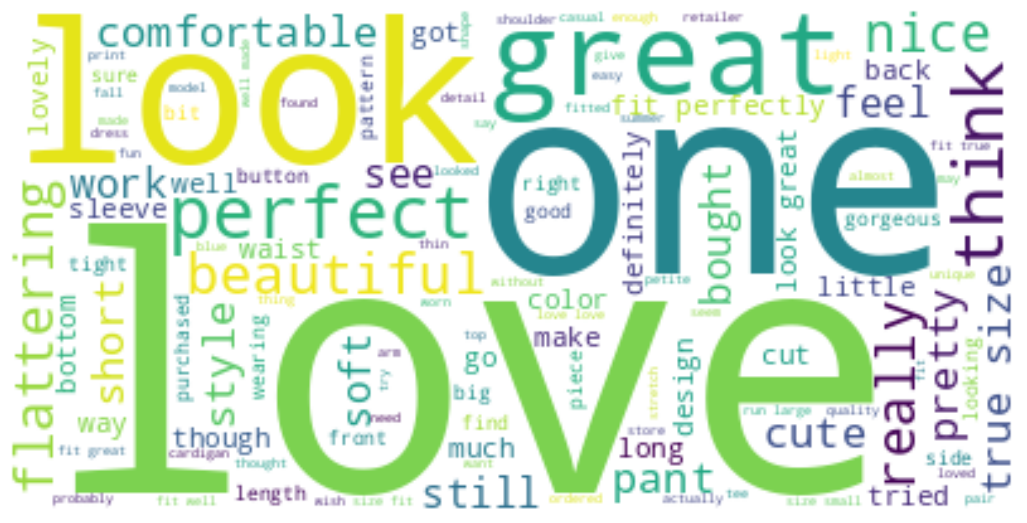

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=len(positive_words))

wordcloud.generate(positive_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

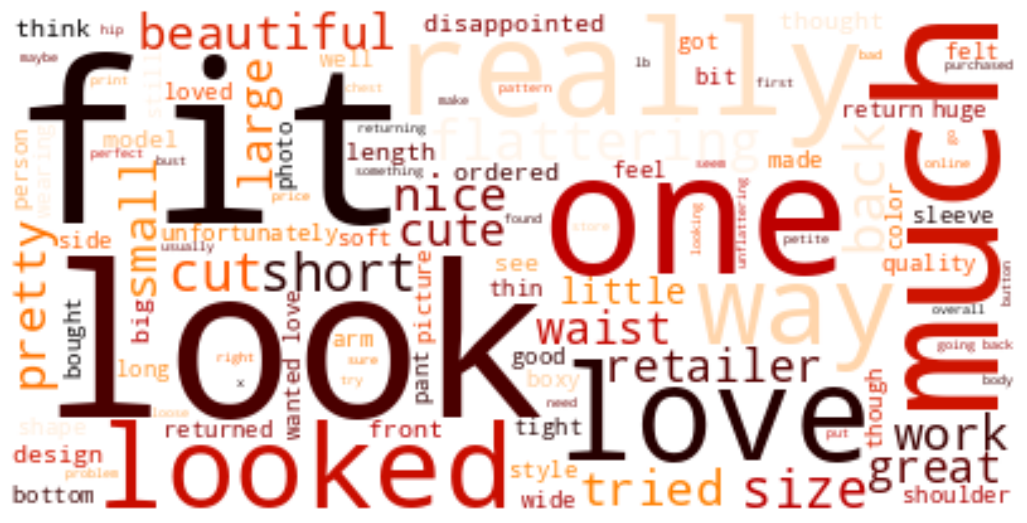

In [ ]:
wordcloud = WordCloud(background_color="white", max_words=len(negative_words), colormap='gist_heat')

wordcloud.generate(negative_words)

plt.figure(figsize=(13,13))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.**

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [30]:
from sklearn.model_selection import train_test_split
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

import pickle

import warnings
warnings.simplefilter('ignore')

In [31]:
X = df1['Review']
y = df1['Recommended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state = 42)

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [34]:
vectorizer.get_feature_names_out()

array(['aa', 'aaaaandidon', 'aaaaannnnnnd', ..., 'zoom', 'zooming',
       'zuma'], dtype=object)

### TF-IDF

In [35]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [36]:
tf_idf_vectorizer = TfidfVectorizer()
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [37]:
tf_idf_vectorizer.get_feature_names_out()

array(['aa', 'aaaaandidon', 'aaaaannnnnnd', ..., 'zoom', 'zooming',
       'zuma'], dtype=object)

### Eval Function

In [38]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

In [39]:
def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

## Logistic Regression

### CountVectorizer

In [40]:
log = LogisticRegression(C = 0.05, max_iter=1000, class_weight='balanced')
log.fit(X_train_count,y_train)

LogisticRegression(C=0.05, class_weight='balanced', max_iter=1000)

In [41]:
print("LOG MODEL CV")
eval(log, X_train_count, X_test_count)

LOG MODEL CV
[[3225  484]
 [ 131  689]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3709
           1       0.59      0.84      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.88      0.93     14831
           1       0.62      0.90      0.74      3281

    accuracy                           0.88     18112
   macro avg       0.80      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112



In [42]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision': make_scorer(precision_score),
            'recall': make_scorer(recall_score),
            'f1': make_scorer(f1_score)}

In [43]:
log = LogisticRegression(C = 0.06, max_iter=1000, class_weight='balanced')
scores = cross_validate(log, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.859650
train_accuracy     0.887588
test_precision     0.578634
train_precision    0.631487
test_recall        0.832068
train_recall       0.911274
test_f1            0.682446
train_f1           0.746006
dtype: float64

In [44]:
!pip install scikit-plot

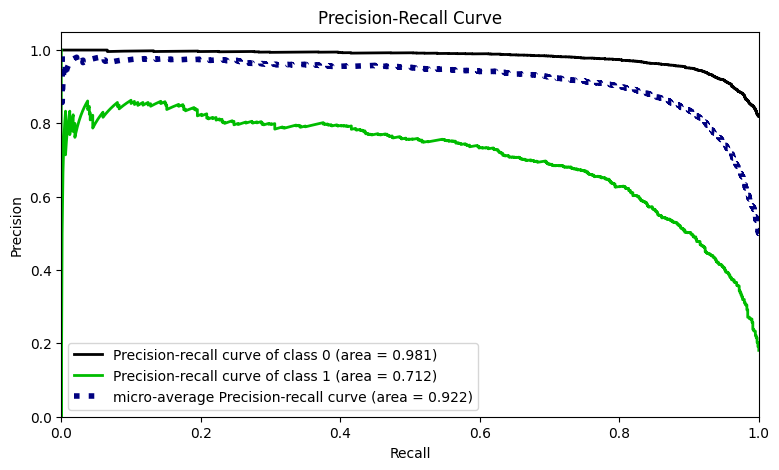

In [45]:
from scikitplot.metrics import plot_roc, plot_precision_recall


log = LogisticRegression(C = 0.06, max_iter=1000, class_weight='balanced')

log.fit(X_train_count, y_train)

y_pred_proba = log.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [46]:
y_test_dummies=pd.get_dummies(y_test)
y_test_dummies

,0,1
12440,1,0
16473,1,0
12789,0,1
11430,1,0
12696,1,0
...,...,...
2332,1,0
3430,1,0
20109,0,1
247,1,0


In [47]:
from sklearn.metrics import average_precision_score
average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

0.9805229476770261

In [48]:
y_pred = log.predict(X_test_count)
log_count_recall= recall_score(y_test, y_pred)
log_count_f1 = f1_score(y_test, y_pred)
log_count_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [49]:
log = LogisticRegression(C = 0.05, max_iter=1000, class_weight='balanced')
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.05, class_weight='balanced', max_iter=1000)

In [50]:
print("LOG MODEL TF_IDF")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL TF_IDF
[[3124  585]
 [ 119  701]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3709
           1       0.55      0.85      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.85      0.78      4529
weighted avg       0.89      0.84      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     14831
           1       0.55      0.88      0.68      3281

    accuracy                           0.85     18112
   macro avg       0.76      0.86      0.79     18112
weighted avg       0.89      0.85      0.86     18112



In [51]:
log = LogisticRegression(C = 0.05, max_iter=1000, class_weight='balanced')
scores = cross_validate(log, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.836848
train_accuracy     0.847584
test_precision     0.531151
train_precision    0.549272
test_recall        0.856753
train_recall       0.884283
test_f1            0.655610
train_f1           0.677630
dtype: float64

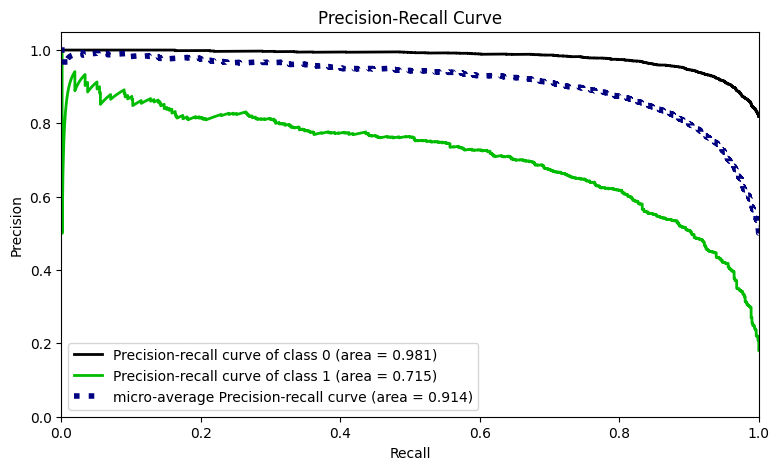

In [52]:
from scikitplot.metrics import plot_roc, plot_precision_recall


log = LogisticRegression(C = 0.06, max_iter=1000, class_weight='balanced')

log.fit(X_train_tf_idf, y_train)

y_pred_proba = log.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [53]:
y_pred = log.predict(X_test_tf_idf)
log_tf_idf_recall= recall_score(y_test, y_pred)
log_tf_idf_f1 = f1_score(y_test, y_pred)
log_tf_idf_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Naive Bayes

### Countvectorizer

In [54]:
nb = MultinomialNB(alpha=1.0)
nb.fit(X_train_count,y_train)

MultinomialNB()

In [55]:
print("NB MODEL CV")
eval(nb, X_train_count, X_test_count)

NB MODEL CV
[[3488  221]
 [ 283  537]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      3709
           1       0.71      0.65      0.68       820

    accuracy                           0.89      4529
   macro avg       0.82      0.80      0.81      4529
weighted avg       0.89      0.89      0.89      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     14831
           1       0.76      0.77      0.76      3281

    accuracy                           0.91     18112
   macro avg       0.85      0.86      0.85     18112
weighted avg       0.91      0.91      0.91     18112



In [56]:
model = MultinomialNB(alpha=1.0)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.882343
train_accuracy     0.914710
test_precision     0.679042
train_precision    0.768700
test_recall        0.665650
train_recall       0.756951
test_f1            0.672019
train_f1           0.762778
dtype: float64

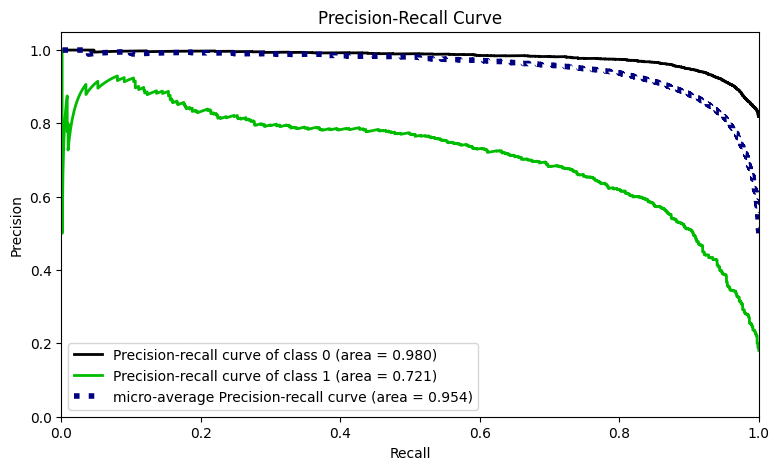

In [57]:
from scikitplot.metrics import plot_roc, plot_precision_recall


nb = MultinomialNB(alpha=1.0)

nb.fit(X_train_count, y_train)

y_pred_proba = nb.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [58]:
y_pred = nb.predict(X_test_count)
nb_count_recall= recall_score(y_test, y_pred)
nb_count_f1 = f1_score(y_test, y_pred)
nb_count_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

In [59]:
log_count_recall

0.8329268292682926

### TF-IDF

In [60]:
nb = BernoulliNB(alpha=0.7)
nb.fit(X_train_tf_idf,y_train)

BernoulliNB(alpha=0.7)

In [61]:
print("NB MODEL TF_IDF")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL TF_IDF
[[3449  260]
 [ 295  525]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.93      0.93      3709
           1       0.67      0.64      0.65       820

    accuracy                           0.88      4529
   macro avg       0.79      0.79      0.79      4529
weighted avg       0.88      0.88      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.95      0.94      0.94     14831
           1       0.73      0.75      0.74      3281

    accuracy                           0.91     18112
   macro avg       0.84      0.85      0.84     18112
weighted avg       0.91      0.91      0.91     18112



In [62]:
model = BernoulliNB(alpha=0.7)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.872791
train_accuracy     0.906765
test_precision     0.645569
train_precision    0.740991
test_recall        0.661691
train_recall       0.746148
test_f1            0.653321
train_f1           0.743556
dtype: float64

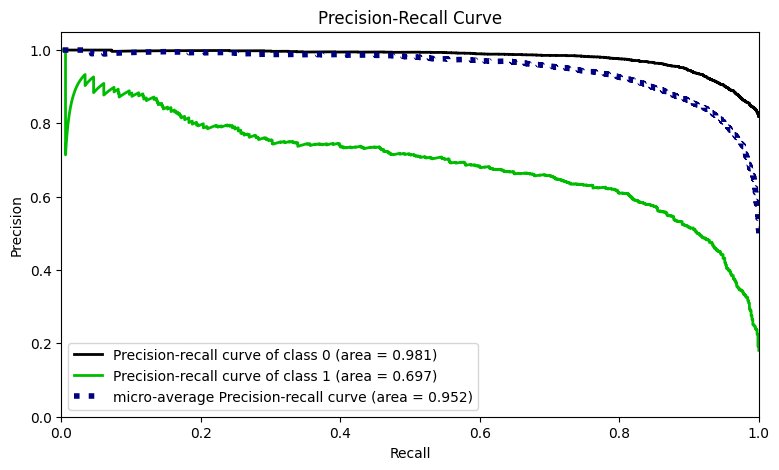

In [63]:
from scikitplot.metrics import plot_roc, plot_precision_recall


nb = BernoulliNB(alpha=0.7)

nb.fit(X_train_tf_idf, y_train)

y_pred_proba = nb.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [64]:
y_pred = nb.predict(X_test_tf_idf)
nb_tf_idf_recall= recall_score(y_test, y_pred)
nb_tf_idf_f1 = f1_score(y_test, y_pred)
nb_tf_idf_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Support Vector Machine (SVM)

### Countvectorizer

In [65]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01)

In [66]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3574  135]
 [ 377  443]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.96      0.93      3709
           1       0.77      0.54      0.63       820

    accuracy                           0.89      4529
   macro avg       0.84      0.75      0.78      4529
weighted avg       0.88      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     14831
           1       0.86      0.63      0.73      3281

    accuracy                           0.91     18112
   macro avg       0.89      0.80      0.84     18112
weighted avg       0.91      0.91      0.91     18112



In [67]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.885435
train_accuracy     0.914231
test_precision     0.759831
train_precision    0.860107
test_recall        0.537959
train_recall       0.628806
test_f1            0.629621
train_f1           0.726480
dtype: float64

In [68]:
from sklearn.metrics import PrecisionRecallDisplay, average_precision_score

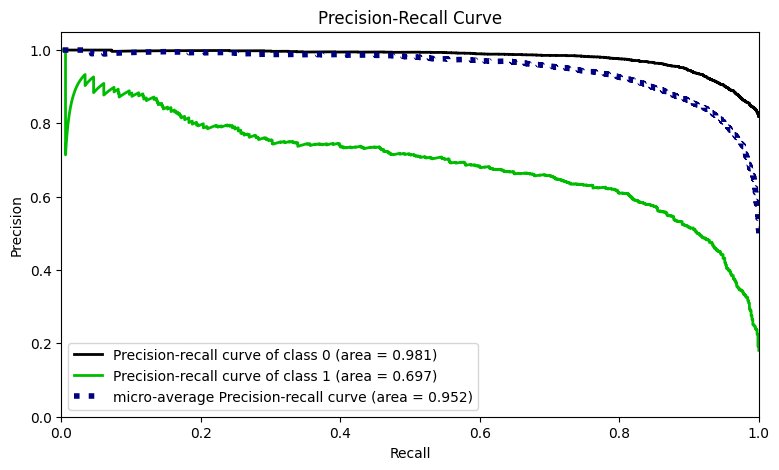

In [69]:
svc.fit(X_train_count, y_train)

y_pred_proba = nb.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [70]:
y_pred = svc.predict(X_test_count)
svc_count_recall= recall_score(y_test, y_pred)
svc_count_f1 = f1_score(y_test, y_pred)
svc_count_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TD-IDF

In [71]:
svc = LinearSVC(C=1.5)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=1.5)

In [72]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3509  200]
 [ 308  512]]
Test_Set
              precision    recall  f1-score   support

           0       0.92      0.95      0.93      3709
           1       0.72      0.62      0.67       820

    accuracy                           0.89      4529
   macro avg       0.82      0.79      0.80      4529
weighted avg       0.88      0.89      0.88      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     14831
           1       0.93      0.85      0.89      3281

    accuracy                           0.96     18112
   macro avg       0.95      0.92      0.93     18112
weighted avg       0.96      0.96      0.96     18112



In [73]:
model = LinearSVC(C=1.5)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.881404
train_accuracy     0.963235
test_precision     0.707881
train_precision    0.932839
test_recall        0.588234
train_recall       0.858884
test_f1            0.642222
train_f1           0.894331
dtype: float64

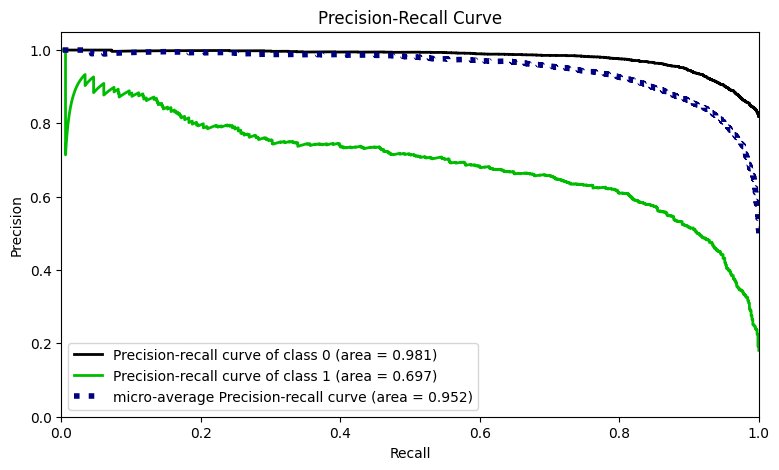

In [74]:
svc.fit(X_train_tf_idf, y_train)

y_pred_proba = nb.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [75]:
y_pred = svc.predict(X_test_tf_idf)
svc_tf_idf_recall= recall_score(y_test, y_pred)
svc_tf_idf_f1 = f1_score(y_test, y_pred)
svc_tf_idf_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Random Forest

### Countvectorizer

In [76]:
rf = RandomForestClassifier(100, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [77]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3163  546]
 [ 152  668]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3709
           1       0.55      0.81      0.66       820

    accuracy                           0.85      4529
   macro avg       0.75      0.83      0.78      4529
weighted avg       0.88      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     14831
           1       0.59      0.88      0.70      3281

    accuracy                           0.87     18112
   macro avg       0.78      0.87      0.81     18112
weighted avg       0.90      0.87      0.88     18112



In [78]:
model = RandomForestClassifier(100, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.845296
train_accuracy     0.879073
test_precision     0.552372
train_precision    0.619726
test_recall        0.777197
train_recall       0.863558
test_f1            0.645536
train_f1           0.721365
dtype: float64

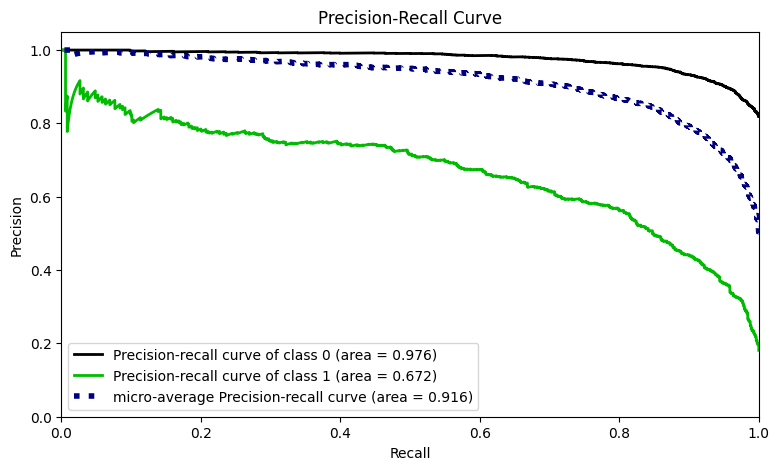

In [86]:
from scikitplot.metrics import plot_roc, plot_precision_recall

rf = RandomForestClassifier(100, max_depth = 10, random_state = 42, n_jobs = -1,class_weight="balanced")

rf.fit(X_train_count, y_train)

y_pred_proba = rf.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [87]:
y_pred = rf.predict(X_test_count)
rf_count_recall= recall_score(y_test, y_pred)
rf_count_f1 = f1_score(y_test, y_pred)
rf_count_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [90]:
rf = RandomForestClassifier(100, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, n_jobs=-1,
                       random_state=42)

In [91]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3157  552]
 [ 177  643]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.85      0.90      3709
           1       0.54      0.78      0.64       820

    accuracy                           0.84      4529
   macro avg       0.74      0.82      0.77      4529
weighted avg       0.87      0.84      0.85      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14831
           1       0.60      0.88      0.71      3281

    accuracy                           0.87     18112
   macro avg       0.78      0.87      0.81     18112
weighted avg       0.90      0.87      0.88     18112



In [92]:
model = RandomForestClassifier(100, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.840271
train_accuracy     0.879828
test_precision     0.542456
train_precision    0.619795
test_recall        0.760135
train_recall       0.872566
test_f1            0.632999
train_f1           0.724649
dtype: float64

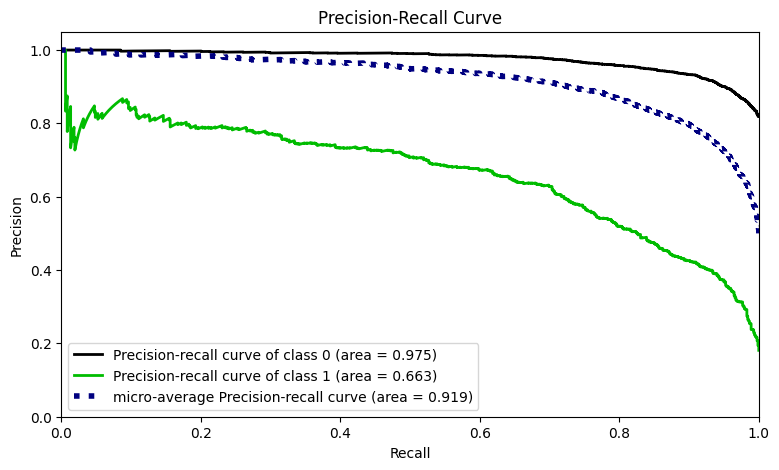

In [93]:
from scikitplot.metrics import plot_roc, plot_precision_recall

rf = RandomForestClassifier(100, max_depth = 10, random_state = 42, n_jobs = -1, class_weight="balanced")

rf.fit(X_train_tf_idf, y_train)

y_pred_proba = rf.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [94]:
y_pred = rf.predict(X_test_tf_idf)
rf_tf_idf_recall= recall_score(y_test, y_pred)
rf_tf_idf_f1 = f1_score(y_test, y_pred)
rf_tf_idf_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## Ada Boosting

### Countvectorizer

In [95]:
ada = AdaBoostClassifier(n_estimators= 700, random_state = 42)
ada.fit(X_train_count, y_train)

AdaBoostClassifier(n_estimators=700, random_state=42)

In [96]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3485  224]
 [ 334  486]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.94      0.93      3709
           1       0.68      0.59      0.64       820

    accuracy                           0.88      4529
   macro avg       0.80      0.77      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     14831
           1       0.82      0.69      0.75      3281

    accuracy                           0.92     18112
   macro avg       0.88      0.83      0.85     18112
weighted avg       0.91      0.92      0.91     18112



In [97]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.874999
train_accuracy     0.908587
test_precision     0.693416
train_precision    0.803110
test_recall        0.556221
train_recall       0.656270
test_f1            0.616995
train_f1           0.722299
dtype: float64

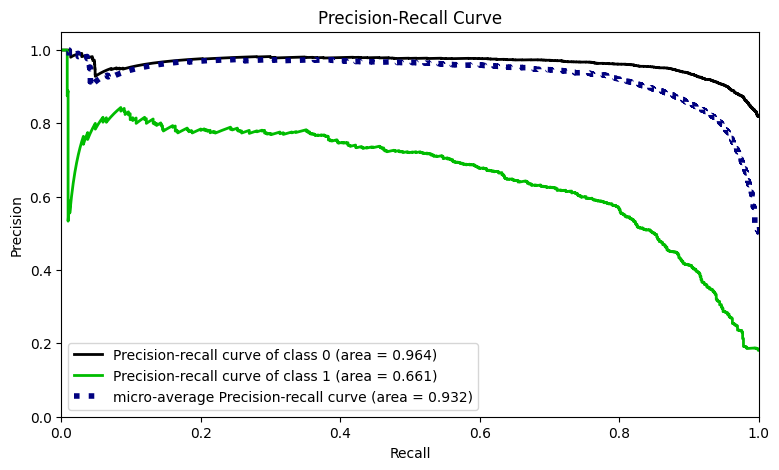

In [98]:
from scikitplot.metrics import plot_roc, plot_precision_recall

y_pred_proba = ada.predict_proba(X_test_count)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [99]:
y_pred = ada.predict(X_test_count)
ada_count_recall= recall_score(y_test, y_pred)
ada_count_f1 = f1_score(y_test, y_pred)
ada_count_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

### TF-IDF

In [100]:
ada = AdaBoostClassifier(n_estimators= 500, random_state = 42)
ada.fit(X_train_tf_idf, y_train)

AdaBoostClassifier(n_estimators=500, random_state=42)

In [101]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3514  195]
 [ 355  465]]
Test_Set
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      3709
           1       0.70      0.57      0.63       820

    accuracy                           0.88      4529
   macro avg       0.81      0.76      0.78      4529
weighted avg       0.87      0.88      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.94      0.97      0.95     14831
           1       0.82      0.70      0.76      3281

    accuracy                           0.92     18112
   macro avg       0.88      0.84      0.86     18112
weighted avg       0.92      0.92      0.92     18112



In [102]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 42)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.871355
train_accuracy     0.921967
test_precision     0.674457
train_precision    0.831994
test_recall        0.561111
train_recall       0.713265
test_f1            0.612451
train_f1           0.768056
dtype: float64

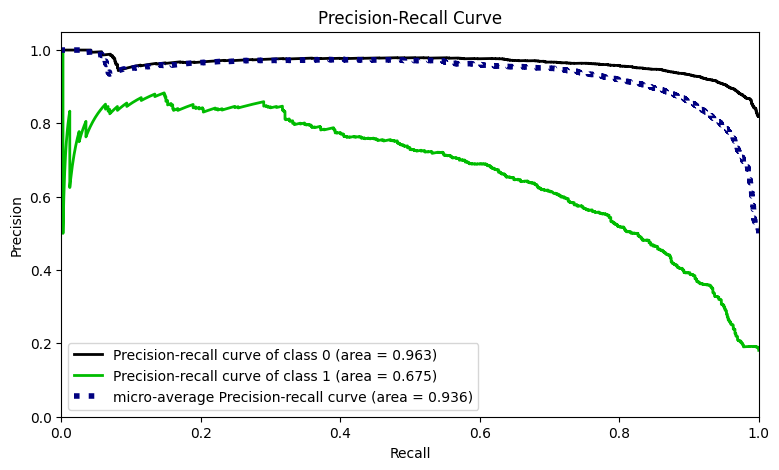

In [103]:
from scikitplot.metrics import plot_roc, plot_precision_recall

y_pred_proba = ada.predict_proba(X_test_tf_idf)

plot_precision_recall(y_test, y_pred_proba)
plt.show();

In [104]:
y_pred = ada.predict(X_test_tf_idf)
ada_tf_idf_recall= recall_score(y_test, y_pred)
ada_tf_idf_f1 = f1_score(y_test, y_pred)
ada_tf_idf_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

## DL modeling

In [105]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GRU, Embedding, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [106]:
df1.head()

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,0
1,love sooo pretty happened find store glad bc n...,0
2,high hope really wanted work initially ordered...,1
3,love love love jumpsuit fun flirty fabulous ev...,0
4,flattering due adjustable front tie perfect le...,0


### Tokenization

In [107]:
num_words = 15001
tokenizer = Tokenizer(num_words=num_words)

In [108]:
tokenizer.fit_on_texts(X_train)

### Creating word index

In [ ]:
tokenizer.word_index

{'fit': 1,
 'size': 2,
 'love': 3,
 'like': 4,
 'look': 5,
 'great': 6,
 'would': 7,
 'small': 8,
 'really': 9,
 'ordered': 10,
 'one': 11,
 'little': 12,
 'perfect': 13,
 'flattering': 14,
 'well': 15,
 'soft': 16,
 'back': 17,
 'cute': 18,
 'bought': 19,
 'comfortable': 20,
 'nice': 21,
 'beautiful': 22,
 'large': 23,
 'bit': 24,
 'length': 25,
 'much': 26,
 'run': 27,
 'also': 28,
 'work': 29,
 'petite': 30,
 'long': 31,
 'short': 32,
 'got': 33,
 'color': 34,
 'waist': 35,
 'medium': 36,
 'x': 37,
 'quality': 38,
 'think': 39,
 'pretty': 40,
 'retailer': 41,
 'store': 42,
 'feel': 43,
 'make': 44,
 'tried': 45,
 'lb': 46,
 'way': 47,
 'usually': 48,
 'get': 49,
 'pant': 50,
 'good': 51,
 'big': 52,
 'go': 53,
 'made': 54,
 'could': 55,
 'cut': 56,
 'see': 57,
 'still': 58,
 'style': 59,
 'super': 60,
 'right': 61,
 'true': 62,
 'online': 63,
 'design': 64,
 'sleeve': 65,
 'wearing': 66,
 'summer': 67,
 'however': 68,
 'purchased': 69,
 'arm': 70,
 'tight': 71,
 'shoulder': 72,
 'fa

In [ ]:
len(tokenizer.word_index)

11115

### Converting tokens to numeric

In [109]:
X_train_num_tokens = tokenizer.texts_to_sequences(X_train)
X_test_num_tokens = tokenizer.texts_to_sequences(X_test)

In [110]:
len(X_train_num_tokens)

18112

In [111]:
X_test[:2]

12906    received sorry return size ordered l way reall...
17092    tried store purchased chocolate brown fit perf...
Name: Review, dtype: object

In [112]:
np.array(X_test_num_tokens[:2], dtype="object")

array([list([149, 1463, 158, 2, 10, 279, 47, 9, 52, 180]),
       list([45, 42, 69, 2611, 471, 1, 13, 844, 377, 7144, 807, 117, 35, 2, 1, 75, 373, 499, 1396, 476, 2742, 102, 58, 88, 6, 682, 205, 15, 326, 1602, 363, 1411, 240, 15, 10, 432, 108, 251])],
      dtype=object)

### Maximum number of tokens for all documents¶

In [113]:
num_tokens = [len(sen_tokens) for sen_tokens in X_train_num_tokens]
num_tokens = np.array(num_tokens)

In [114]:
num_tokens

array([16, 40, 42, ...,  4, 12, 28])

In [115]:
num_tokens.max()

56

In [116]:
num_tokens.argmax()

5616

In [117]:
X_train.iloc[5616]

'reviewer said pretty short nice design wish little longer short tried xx regular x petite x regular xx closest flattering around part shoulder cehst stil la bit short petite jsut short x regular bit longer little loose o hte fit jsut ddind work may wait sale probably something beter wil lcome along great want show asset'

In [118]:
max_tokens = 45

In [119]:
sum(num_tokens <= max_tokens) / len(num_tokens)

0.9649955830388692

In [120]:
sum(num_tokens <= max_tokens)

17478

In [121]:
len(num_tokens)

18112

### Fixing token counts of all documents (pad_sequences)

In [122]:
X_train_pad = pad_sequences(X_train_num_tokens, maxlen=max_tokens, padding="pre")
X_test_pad = pad_sequences(X_test_num_tokens, maxlen=max_tokens, padding="pre")

In [123]:
display(X_train_pad.shape)
display(X_test_pad.shape)

(18112, 45)

(4529, 45)

### Modeling

In [124]:
model = Sequential()

In [125]:
embedding_size = 50

In [126]:
model.add(Embedding(input_dim=num_words,
                    output_dim=embedding_size,
                    input_length=max_tokens))

model.add(Dropout(0.2))

model.add(GRU(units=50, return_sequences=True))

model.add(Dropout(0.2))

model.add(GRU(units=25, return_sequences=True))

model.add(Dropout(0.2))

model.add(GRU(units=12, return_sequences=False))

model.add(Dense(1, activation='sigmoid'))


In [127]:
optimizer = Adam(learning_rate=0.008)

In [128]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['Recall'])

In [129]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 45, 50)            750050    
                                                                 
 dropout (Dropout)           (None, 45, 50)            0         
                                                                 
 gru (GRU)                   (None, 45, 50)            15300     
                                                                 
 dropout_1 (Dropout)         (None, 45, 50)            0         
                                                                 
 gru_1 (GRU)                 (None, 45, 25)            5775      
                                                                 
 dropout_2 (Dropout)         (None, 45, 25)            0         
                                                                 
 gru_2 (GRU)                 (None, 12)                1

In [130]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall",
                           mode="max",
                           patience = 1,
                           restore_best_weights=True,
                           verbose=1)

In [131]:
weights = {0:0.18, 1:0.81}

In [132]:
model.fit(X_train_pad,
          y_train,
          epochs=10,
          batch_size=256,
          class_weight=weights,   #sample_weight= classes_weights
          validation_data=(X_test_pad, y_test),
          callbacks=[early_stop])

Epoch 1/10
71/71 [==============================] - 35s 283ms/step - loss: 0.1365 - recall: 0.7842 - val_loss: 0.3411 - val_recall: 0.8354
Epoch 2/10
71/71 [==============================] - 17s 247ms/step - loss: 0.0853 - recall: 0.9083 - val_loss: 0.2978 - val_recall: 0.8000
Epoch 2: early stopping


### Model Evaluation

In [133]:
model_loss = pd.DataFrame(model.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.136481,0.784212,0.341143,0.835366
1,0.085301,0.908260,0.297765,0.800000


<Axes: >

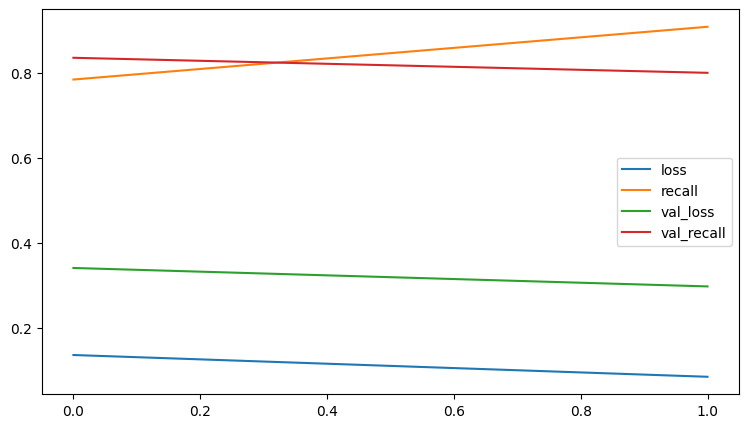

In [134]:
model_loss.plot()

In [135]:
model.evaluate(X_test_pad, y_test)

142/142 [==============================] - 3s 19ms/step - loss: 0.3411 - recall: 0.8354


[0.3411426246166229, 0.8353658318519592]

In [136]:
model.evaluate(X_train_pad, y_train)

566/566 [==============================] - 14s 24ms/step - loss: 0.2916 - recall: 0.9080


[0.2915707230567932, 0.9079548716545105]

In [137]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

y_pred = model.predict(X_test_pad) >= 0.5

print(confusion_matrix(y_test, y_pred))
print("-------------------------------------------------------")
print(classification_report(y_test, y_pred))

142/142 [==============================] - 4s 19ms/step
[[3190  519]
 [ 135  685]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.57      0.84      0.68       820

    accuracy                           0.86      4529
   macro avg       0.76      0.85      0.79      4529
weighted avg       0.89      0.86      0.87      4529



In [138]:
y_train_pred = model.predict(X_train_pad) >= 0.5

print(confusion_matrix(y_train, y_train_pred))
print("-------------------------------------------------------")
print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 11s 19ms/step
[[12989  1842]
 [  302  2979]]
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.88      0.92     14831
           1       0.62      0.91      0.74      3281

    accuracy                           0.88     18112
   macro avg       0.80      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112



142/142 [==============================] - 3s 20ms/step


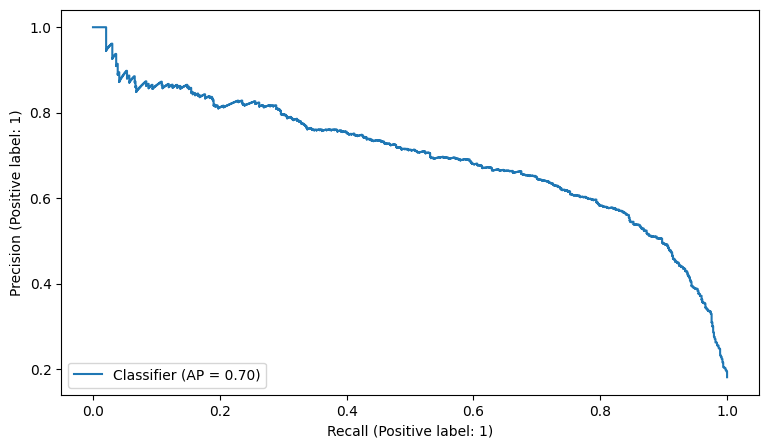

In [139]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(X_test_pad)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [140]:
from sklearn.metrics import precision_recall_curve, average_precision_score

DLmodel_AP = average_precision_score(y_test, y_pred_proba)
DLmodel_AP

0.698053231840476

In [141]:
DLmodel_recall= recall_score(y_test, y_pred)
DLmodel_f1 = f1_score(y_test, y_pred)

## BERT Modeling

In [142]:
!pip install transformers==4.37.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 47.5 MB/s eta 0:00:00
  Attempting uninstall: tokenizers
    Found existing installation: tokenizers 0.19.1
    Uninstalling tokenizers-0.19.1:
      Successfully uninstalled tokenizers-0.19.1
  Attempting uninstall: transformers
    Found existing installation: transformers 4.40.0
    Uninstalling transformers-4.40.0:
      Successfully uninstalled transformers-4.40.0


In [143]:
import tensorflow as tf
print("Tensorflow version " + tf.__version__)

try:
  tpu = tf.distribute.cluster_resolver.TPUClusterResolver()

  print(f'Running on a TPU w/{tpu.num_accelerators()["TPU"]} cores')
except ValueError:
  raise BaseException('ERROR: Not connected to a TPU runtime; please see the previous cell in this notebook for instructions!')

tf.config.experimental_connect_to_cluster(tpu)

tf.tpu.experimental.initialize_tpu_system(tpu)

tpu_strategy = tf.distribute.TPUStrategy(tpu)

Tensorflow version 2.12.0
Running on a TPU w/0 cores


### Read Data

In [144]:
df1.head()

,Review,Recommended
0,absolutely wonderful silky sexy comfortable,0
1,love sooo pretty happened find store glad bc n...,0
2,high hope really wanted work initially ordered...,1
3,love love love jumpsuit fun flirty fabulous ev...,0
4,flattering due adjustable front tie perfect le...,0


### Train test split

In [145]:
X=df1['Review']
y=df1['Recommended']

In [146]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Tokenization

In [147]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

### Fixing token counts of all documents

In [148]:
number_tokens_sentences = []
for sent in X_train:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.

    input_ids = tokenizer.encode(sent,
                                 add_special_tokens=True)

    number_tokens_sentences.append(len(input_ids))

print('Max sentence length: ', max(number_tokens_sentences))


Max sentence length:  73


In [149]:
sum(np.array(number_tokens_sentences) <= 55) / len(number_tokens_sentences)

0.983767667844523

### Transformation Vectors to Matrices

In [150]:
def transformation(X):

  seq_len = 55


  Xids = []
  Xmask = []


  for sentence in X: # corpustan tüm yorumları sırayla çekiyoruz.

      tokens = tokenizer.encode_plus(sentence,
                                     max_length=seq_len,
                                     truncation=True,
                                     padding='max_length',
                                     add_special_tokens=True)
      # çektiğimiz herbir yorumu(sentence) vektörlere dönüştürüyoruz.


      Xids.append(tokens['input_ids'])
      Xmask.append(tokens['attention_mask'])
  return np.array(Xids), np.array(Xmask)

In [151]:
Xids_train, Xmask_train = transformation(X_train)
Xids_test, Xmask_test = transformation(X_test)

In [152]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (18112, 55)
Xmask_train.shape : (18112, 55)
Xids_test.shape   : (4529, 55)
Xmask_test.shape  : (4529, 55)


In [153]:
y_train

11893    0
1294     0
7811     0
15166    0
18750    1
        ..
504      0
6860     0
7610     0
7683     0
20181    1
Name: Recommended, Length: 18112, dtype: int64

In [154]:
labels_train = np.array(y_train).reshape(-1,1)
labels_train

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [155]:
y_test

12440    0
16473    0
12789    1
11430    0
12696    0
        ..
2332     0
3430     0
20109    1
247      0
14620    0
Name: Recommended, Length: 4529, dtype: int64

In [156]:
labels_test = np.array(y_test).reshape(-1,1)
labels_test

array([[0],
       [0],
       [1],
       ...,
       [1],
       [0],
       [0]])

### Transformation Matrix to Tensorflow tensor

In [157]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_train

<_TensorSliceDataset element_spec=(TensorSpec(shape=(55,), dtype=tf.int64, name=None), TensorSpec(shape=(55,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [158]:
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_test

<_TensorSliceDataset element_spec=(TensorSpec(shape=(55,), dtype=tf.int64, name=None), TensorSpec(shape=(55,), dtype=tf.int64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [159]:
def map_func(Tensor_Xids, Tensor_Xmask, Tensor_labels):

    return {'input_ids': Tensor_Xids, 'attention_mask': Tensor_Xmask}, Tensor_labels

In [160]:
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)

In [161]:
dataset_train

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(55,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(55,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

In [162]:
dataset_test

<_MapDataset element_spec=({'input_ids': TensorSpec(shape=(55,), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(55,), dtype=tf.int64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>

### Batch Size

In [163]:
batch_size = 32

train_ds = dataset_train.batch(batch_size)
val_ds = dataset_test.batch(batch_size)

In [164]:
train_ds

<_BatchDataset element_spec=({'input_ids': TensorSpec(shape=(None, 55), dtype=tf.int64, name=None), 'attention_mask': TensorSpec(shape=(None, 55), dtype=tf.int64, name=None)}, TensorSpec(shape=(None, 1), dtype=tf.int64, name=None))>

### Creating Model with TPU

In [165]:
def create_model():
    from transformers import TFAutoModel

    from tensorflow.keras.layers import Input, Dropout, Dense, BatchNormalization
    from tensorflow.keras import Model

    model = TFAutoModel.from_pretrained("bert-base-uncased")
    input_ids = Input(shape=(55,), name='input_ids', dtype='int32')
    attention_mask = Input(shape=(55,), name='attention_mask', dtype='int32')

    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"]

    x = Dense(55, activation='relu')(embeddings)
    x = BatchNormalization()(x)
    x = Dropout(0.1)(x)
    y = Dense(1, activation='sigmoid', name='outputs')(x)

    return Model(inputs=[input_ids, attention_mask], outputs=y)


In [166]:
with tpu_strategy.scope():

  from transformers import TFAutoModelForSequenceClassification
  from tensorflow.keras.optimizers import AdamW
  from tensorflow.keras.losses import BinaryCrossentropy, CategoricalCrossentropy
  from tensorflow.keras.metrics import Recall



  optimizer = AdamW(learning_rate=2e-5)
  loss = BinaryCrossentropy()
  recall = Recall()
  model_bert = create_model()
  model_bert.compile(optimizer=optimizer, loss=loss, metrics=[recall])

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

In [167]:
model_bert.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 55)]         0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 55)]         0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 55,                                            

**Model Fitting**

In [168]:
weights = {0:0.18, 1:0.81}

In [173]:
model_bert.fit(train_ds, validation_data= val_ds, epochs=2, class_weight=weights)

Epoch 1/2
566/566 [==============================] - 44s 78ms/step - loss: 0.1167 - recall: 0.9150 - val_loss: 0.7496 - val_recall: 0.9390
Epoch 2/2
566/566 [==============================] - 44s 77ms/step - loss: 0.1032 - recall: 0.9387 - val_loss: 0.5629 - val_recall: 0.8854


In [174]:
model_loss = pd.DataFrame(model_bert.history.history)
model_loss.head()

,loss,recall,val_loss,val_recall
0,0.116682,0.914965,0.749560,0.939024
1,0.103168,0.938738,0.562877,0.885366


<Axes: >

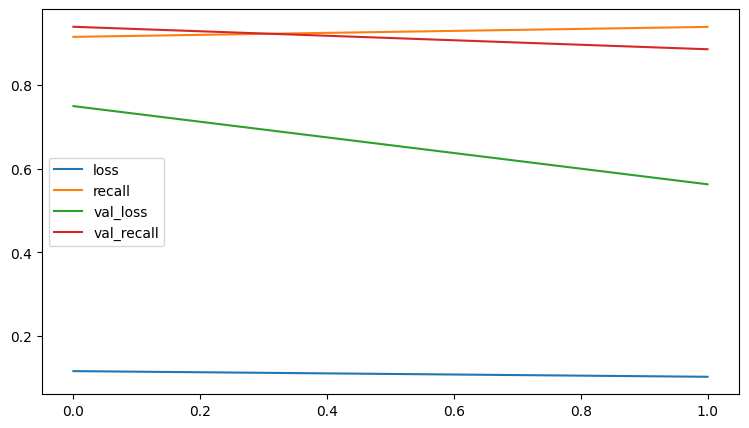

In [175]:
model_loss.plot()

**Model Evaluation**

In [176]:
model_bert.evaluate(train_ds)

566/566 [==============================] - 16s 25ms/step - loss: 0.3541 - recall: 0.9793


[0.3541111350059509, 0.9792746305465698]

In [177]:
model_bert.evaluate(val_ds)

142/142 [==============================] - 5s 25ms/step - loss: 0.5629 - recall: 0.8854


[0.5628770589828491, 0.8853658437728882]

In [178]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model_bert.predict(val_ds) >= 0.5


print(classification_report(y_test, y_pred))

142/142 [==============================] - 16s 72ms/step
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3709
           1       0.56      0.89      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.87      0.80      4529
weighted avg       0.90      0.86      0.87      4529



In [179]:
y_train_pred = model_bert.predict(train_ds) >= 0.5


print(classification_report(y_train, y_train_pred))

566/566 [==============================] - 12s 20ms/step
              precision    recall  f1-score   support

           0       0.99      0.90      0.94     14831
           1       0.68      0.98      0.80      3281

    accuracy                           0.91     18112
   macro avg       0.84      0.94      0.87     18112
weighted avg       0.94      0.91      0.92     18112



142/142 [==============================] - 5s 20ms/step


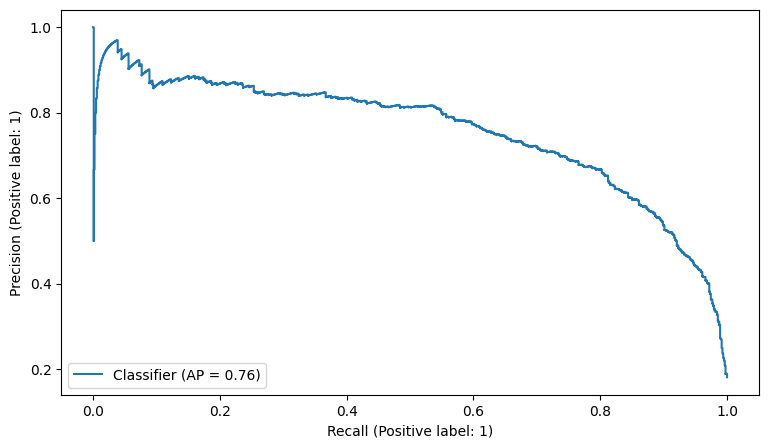

In [180]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model_bert.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

In [181]:
y_pred = model_bert.predict(val_ds) >= 0.5
model_bert_recall= recall_score(y_test, y_pred)
model_bert_f1 = f1_score(y_test, y_pred)
model_bert_AP = average_precision_score(y_test_dummies[0], y_pred_proba[:, 0])

142/142 [==============================] - 4s 19ms/step


### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [182]:
compare = pd.DataFrame({"Model": ["NaiveBayes_count","NaiveBayes_tfidf", "LogReg_count","LogReg_tfidf", "SVM_count","SVM_tfidf", "Random Forest_count",
                                  "Random Forest_tfidf", "AdaBoost_count", "AdaBoost_tfidf","DL_model", "Bert_model"],
                        "F1_Score": [nb_count_f1,nb_tf_idf_f1,log_count_f1,log_tf_idf_f1, svc_count_f1,
                                     svc_tf_idf_f1, rf_count_f1,rf_tf_idf_f1, ada_count_f1, ada_tf_idf_f1,
                                     DLmodel_f1, model_bert_f1],
                        "Recall_Score": [nb_count_recall,nb_tf_idf_recall, log_count_recall,log_tf_idf_recall, svc_count_recall,
                                         svc_tf_idf_recall, rf_count_recall,rf_tf_idf_recall, ada_count_recall, ada_tf_idf_recall,
                                         DLmodel_recall, model_bert_recall],
                        "Average_Precision_Score": [nb_count_AP,nb_tf_idf_AP, log_count_AP, log_tf_idf_AP, svc_count_AP,svc_tf_idf_AP, rf_count_AP,
                                                     rf_tf_idf_AP, ada_count_AP, ada_tf_idf_AP, DLmodel_AP, model_bert_AP]})
compare

,Model,F1_Score,Recall_Score,Average_Precision_Score
0,NaiveBayes_count,0.680608,0.654878,0.979726
1,NaiveBayes_tfidf,0.654206,0.640244,0.980901
2,LogReg_count,0.690248,0.832927,0.980523
3,LogReg_tfidf,0.667620,0.853659,0.981325
4,SVM_count,0.633763,0.540244,0.980901
5,SVM_tfidf,0.668407,0.624390,0.980901
6,Random Forest_count,0.656834,0.814634,0.975992
7,Random Forest_tfidf,0.638213,0.784146,0.975200
8,AdaBoost_count,0.635294,0.592683,0.963678
9,AdaBoost_tfidf,0.628378,0.567073,0.963404


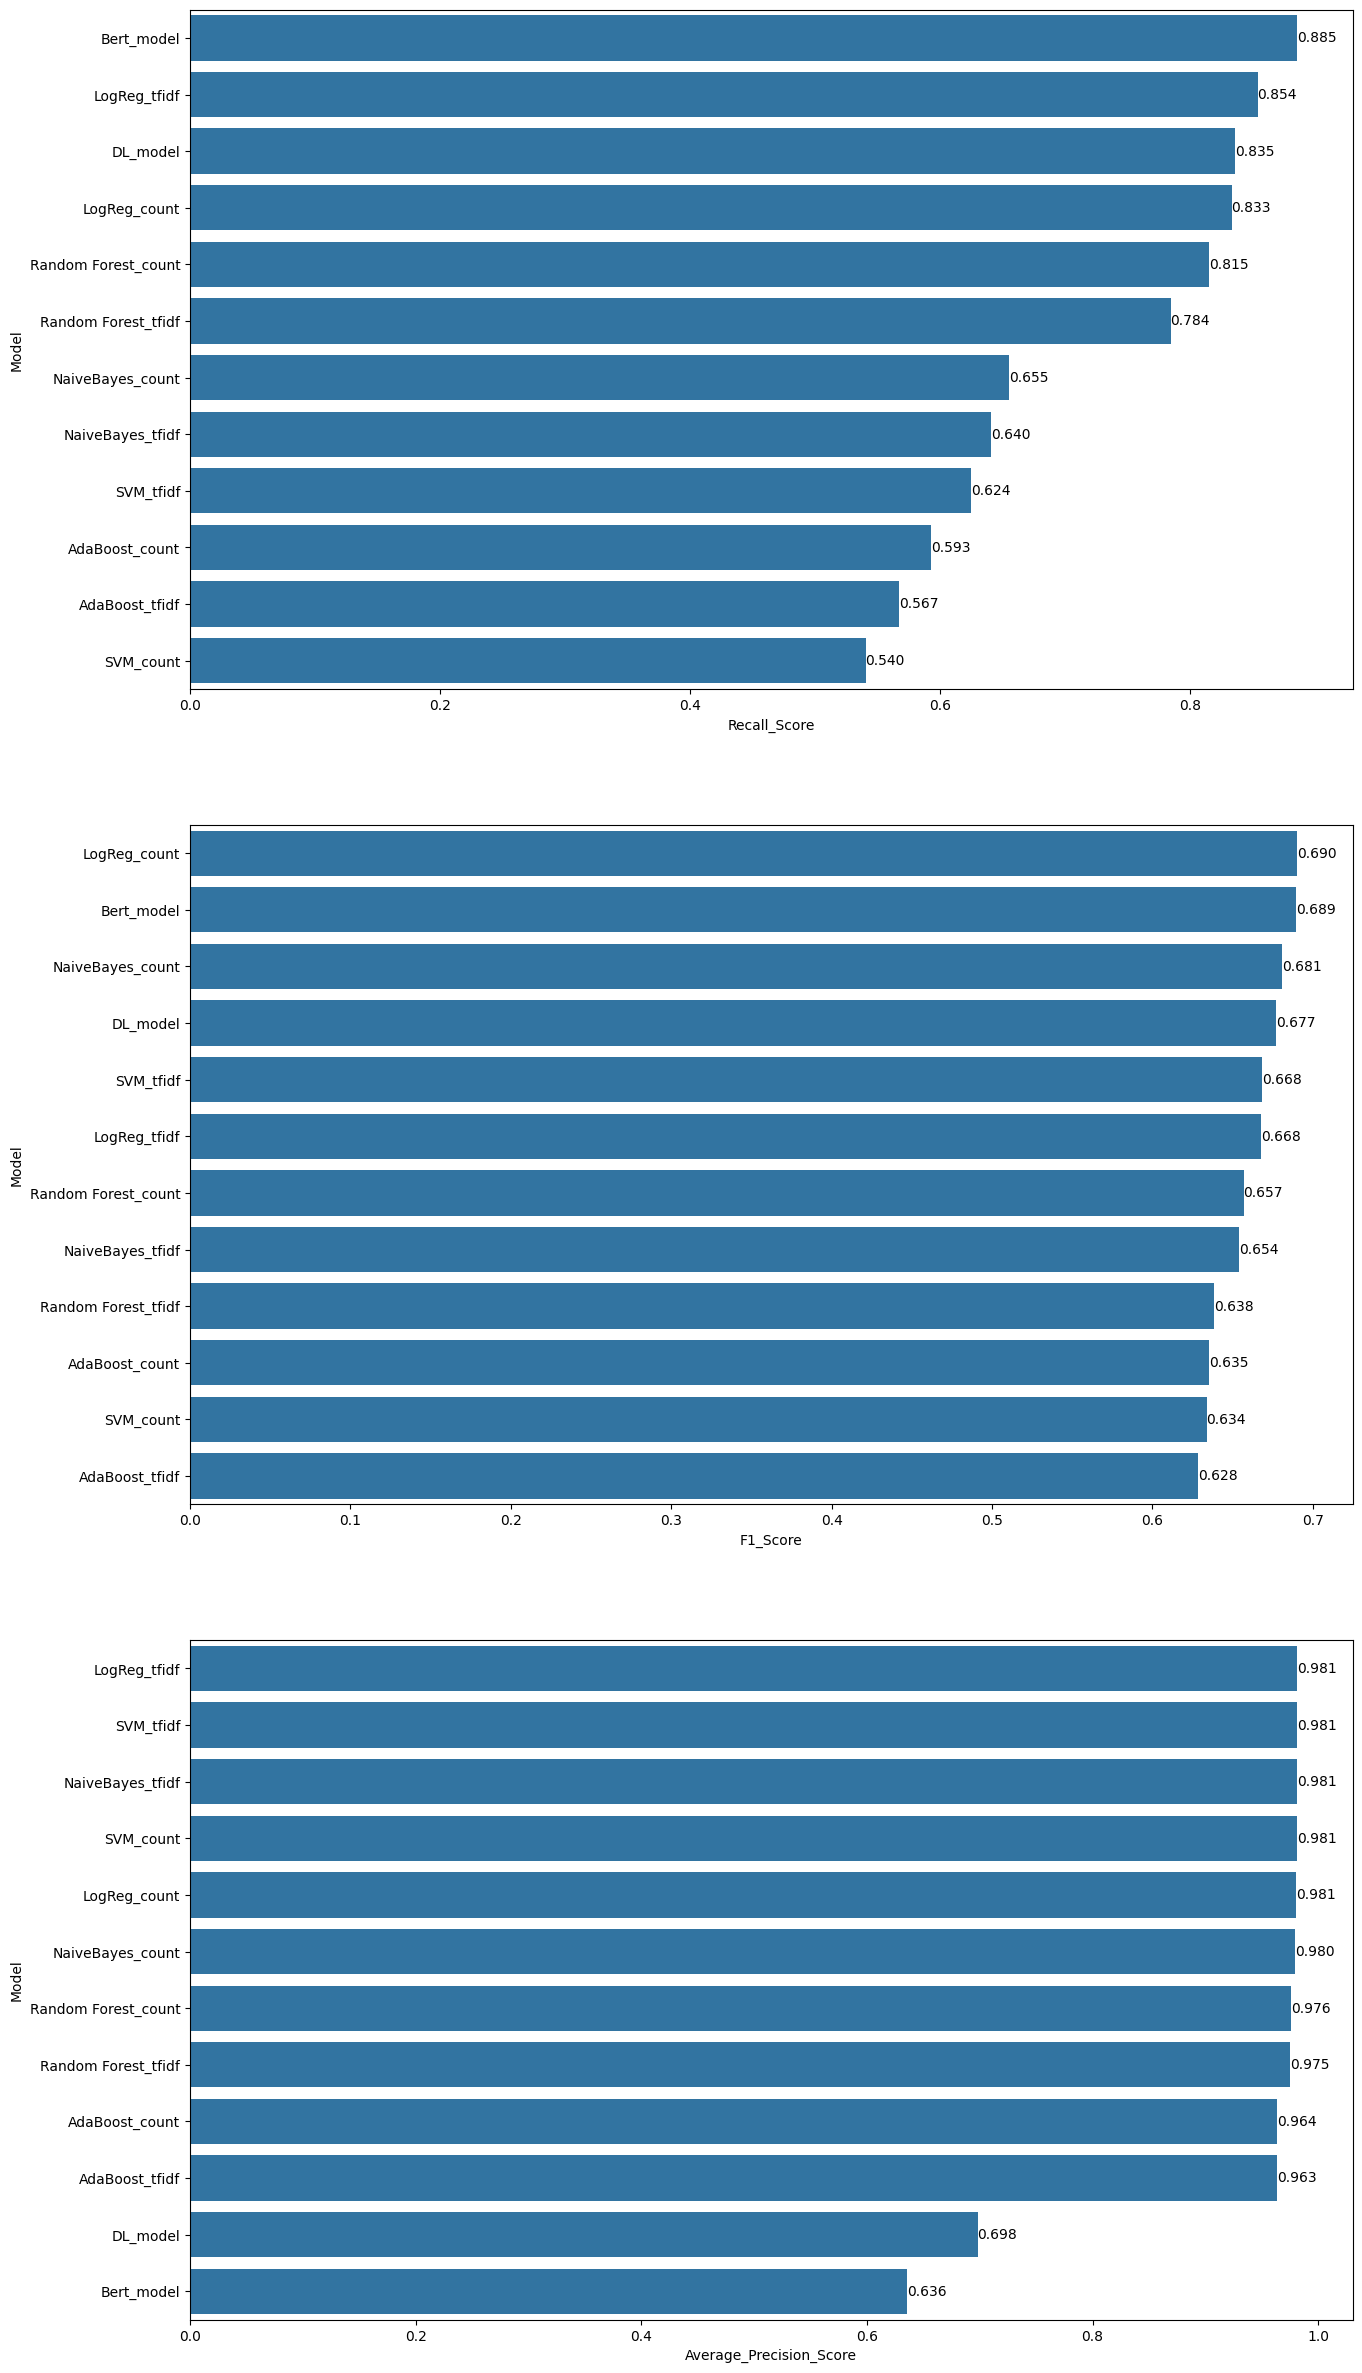

In [183]:
plt.figure(figsize=(15,30))
plt.subplot(311)
compare = compare.sort_values(by="Recall_Score", ascending=False)
ax=sns.barplot(x="Recall_Score", y="Model", data=compare)
ax.bar_label(ax.containers[0], fmt="%.3f")
plt.subplot(312)
compare = compare.sort_values(by="F1_Score", ascending=False)
ax=sns.barplot(x="F1_Score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.subplot(313)
compare = compare.sort_values(by="Average_Precision_Score", ascending=False)
ax=sns.barplot(x="Average_Precision_Score", y="Model", data=compare)
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

### Conclusion

This project aimed to determine product recommendations using sentiment analysis. We started with data engineering and text mining; in this scope, we converted the text into tokens, removed punctuation marks, numbers, stop words, and performed normalization using lemmatization. Then, we used a bag of words model to convert the text into numerical feature vectors. To address the imbalance issue in our data, we applied balancing techniques to the models we used. Next, we trained 7 different classification models, and we achieved the highest recall rate of 89% with the Bert
model.

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___